## Week 3 Tokenization

In [ ]:
#!pip install nltk

In [1]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [47]:
#libraries
import numpy as np
import nltk
import string
import collections
from nltk.corpus import gutenberg
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pandas as pd

## 1. Tokenization Pipeline

In [17]:
text = '''Joe waited for the train. The train was late. Mary and Samantha took the bus. 
I looked for Mary and Samantha at the bus stations. '''

Sentence Level

In [20]:
tokenized_text=sent_tokenize(text) 
print(tokenized_text)

['Joe waited for the train.', 'The train was late.', 'Mary and Samantha took the bus.', 'I looked for Mary and Samantha at the bus stations.']


Word Level

In [23]:
tokenized_word=word_tokenize(text)
print(tokenized_word)

['Joe', 'waited', 'for', 'the', 'train', '.', 'The', 'train', 'was', 'late', '.', 'Mary', 'and', 'Samantha', 'took', 'the', 'bus', '.', 'I', 'looked', 'for', 'Mary', 'and', 'Samantha', 'at', 'the', 'bus', 'stations', '.']


Sentence + word levels

In [25]:
tokens = [word_tokenize(t) for t in sent_tokenize(text)]
print(tokens)

[['Joe', 'waited', 'for', 'the', 'train', '.'], ['The', 'train', 'was', 'late', '.'], ['Mary', 'and', 'Samantha', 'took', 'the', 'bus', '.'], ['I', 'looked', 'for', 'Mary', 'and', 'Samantha', 'at', 'the', 'bus', 'stations', '.']]


## Step 2 Text

In [7]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [26]:
alice = gutenberg.raw(fileids='carroll-alice.txt')

### Sentence Tokenizer

In [27]:
alice_sentences = sent_tokenize(text=alice)

In [28]:
print('Total sentences in alice:', len(alice_sentences))
print('First 2 sentences in alice:-')
print(np.array(alice_sentences[0:2]))

Total sentences in alice: 1625
First 2 sentences in alice:-
["[Alice's Adventures in Wonderland by Lewis Carroll 1865]\n\nCHAPTER I."
 "Down the Rabbit-Hole\n\nAlice was beginning to get very tired of sitting by her sister on the\nbank, and of having nothing to do: once or twice she had peeped into the\nbook her sister was reading, but it had no pictures or conversations in\nit, 'and what is the use of a book,' thought Alice 'without pictures or\nconversation?'"]


### Word Tokenizer

In [29]:
words = word_tokenize(alice)
np.array(words[0:5])

array(['[', 'Alice', "'s", 'Adventures', 'in'], dtype='<U10')

In [30]:
tokens_sentences = [word_tokenize(t) for t in sent_tokenize(alice)]
np.array(tokens_sentences[0:5])

array([list(['[', 'Alice', "'s", 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', ']', 'CHAPTER', 'I', '.']),
       list(['Down', 'the', 'Rabbit-Hole', 'Alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by', 'her', 'sister', 'on', 'the', 'bank', ',', 'and', 'of', 'having', 'nothing', 'to', 'do', ':', 'once', 'or', 'twice', 'she', 'had', 'peeped', 'into', 'the', 'book', 'her', 'sister', 'was', 'reading', ',', 'but', 'it', 'had', 'no', 'pictures', 'or', 'conversations', 'in', 'it', ',', "'and", 'what', 'is', 'the', 'use', 'of', 'a', 'book', ',', "'", 'thought', 'Alice', "'without", 'pictures', 'or', 'conversation', '?', "'"]),
       list(['So', 'she', 'was', 'considering', 'in', 'her', 'own', 'mind', '(', 'as', 'well', 'as', 'she', 'could', ',', 'for', 'the', 'hot', 'day', 'made', 'her', 'feel', 'very', 'sleepy', 'and', 'stupid', ')', ',', 'whether', 'the', 'pleasure', 'of', 'making', 'a', 'daisy-chain', 'would', 'be', 'worth', 'the', 'troub

In [13]:
words = [word for sentence in tokens_sentences for word in sentence]
print(words[1:25])

['Alice', "'s", 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', ']', 'CHAPTER', 'I', '.', 'Down', 'the', 'Rabbit-Hole', 'Alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of']


In [31]:
from nltk.probability import FreqDist 
fdist = FreqDist(words) 
print(fdist)

<FreqDist with 3185 samples and 33493 outcomes>


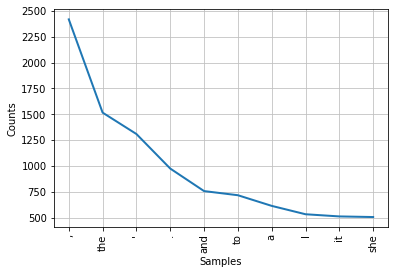

In [32]:
import matplotlib.pyplot as plt
fdist.plot(10,cumulative=False)
plt.show()

### Remove Punctuation

In [36]:
# remove all tokens that are not alphabetic
words = [word.lower() for word in words if word.isalpha()]
print(words[:100])

['alice', 'adventures', 'in', 'wonderland', 'by', 'lewis', 'carroll', 'chapter', 'i', 'down', 'the', 'alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by', 'her', 'sister', 'on', 'the', 'bank', 'and', 'of', 'having', 'nothing', 'to', 'do', 'once', 'or', 'twice', 'she', 'had', 'peeped', 'into', 'the', 'book', 'her', 'sister', 'was', 'reading', 'but', 'it', 'had', 'no', 'pictures', 'or', 'conversations', 'in', 'it', 'what', 'is', 'the', 'use', 'of', 'a', 'book', 'thought', 'alice', 'pictures', 'or', 'conversation', 'so', 'she', 'was', 'considering', 'in', 'her', 'own', 'mind', 'as', 'well', 'as', 'she', 'could', 'for', 'the', 'hot', 'day', 'made', 'her', 'feel', 'very', 'sleepy', 'and', 'stupid', 'whether', 'the', 'pleasure', 'of', 'making', 'a', 'would', 'be', 'worth', 'the']


In [38]:
word_counts = collections.Counter(words)
word_counts.most_common(10)

[('the', 1616),
 ('and', 810),
 ('to', 720),
 ('a', 631),
 ('she', 544),
 ('it', 539),
 ('i', 533),
 ('of', 499),
 ('said', 462),
 ('alice', 396)]

In [47]:
all_chars = len(alice)
num_chars = len(alice.translate(str.maketrans('','',whitespace)))
num_words = len(words)
num_sents = len(tokens_sentences)
num_vocab = len(set(words))
print(int(all_chars/num_words),int(num_chars/num_words), 
      int(num_words/num_sents), 
      int(num_words/num_vocab))

5 4 16 10


In [41]:
stop_words = stopwords.words('english')
filtered_words = [w for w in words if not w in stop_words] 

In [42]:
word_counts = collections.Counter(filtered_words)
word_counts.most_common(10)

[('said', 462),
 ('alice', 396),
 ('little', 128),
 ('one', 99),
 ('would', 90),
 ('know', 88),
 ('could', 86),
 ('like', 85),
 ('went', 83),
 ('queen', 75)]

In [28]:
custom_list = ['like','would','could','said','one'] # add more stopwords
stop_words.extend(custom_list)

In [29]:
extended_words = [w for w in words if not w in stop_words] 
word_counts = collections.Counter(extended_words)
word_counts.most_common(10)

[('alice', 398),
 ('little', 128),
 ('know', 88),
 ('went', 83),
 ('queen', 75),
 ('thought', 74),
 ('time', 71),
 ('see', 67),
 ('well', 63),
 ('king', 63)]

In [ ]:
stop_words = list(set(stopwords.words('english')) - set(['again', 'once', 'from'])) # remove stopswords

### Stemmers

In [46]:
ps = PorterStemmer()
stemmed = [ps.stem(word) for word in words]
print(stemmed[0:10])

['alic', 'adventur', 'in', 'wonderland', 'by', 'lewi', 'carrol', 'chapter', 'i', 'down']


### Lemmatizer

In [53]:
lemmatizer = WordNetLemmatizer()
lemmatized = [lemmatizer.lemmatize(w) for w in filtered_words]
print(lemmatized[0:10])

['alice', 'adventure', 'wonderland', 'lewis', 'carroll', 'chapter', 'alice', 'beginning', 'get', 'tired']


## POS 

In [57]:
nltk_pos_tagged = nltk.pos_tag(words[15:30])
pd.DataFrame(nltk_pos_tagged, columns=['Word', 'POS tag']).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Word,get,very,tired,of,sitting,by,her,sister,on,the,bank,and,of,having,nothing
POS tag,VB,RB,JJ,IN,VBG,IN,PRP$,NN,IN,DT,NN,CC,IN,VBG,NN


In [58]:
nltk_pos_tagged

[('get', 'VB'),
 ('very', 'RB'),
 ('tired', 'JJ'),
 ('of', 'IN'),
 ('sitting', 'VBG'),
 ('by', 'IN'),
 ('her', 'PRP$'),
 ('sister', 'NN'),
 ('on', 'IN'),
 ('the', 'DT'),
 ('bank', 'NN'),
 ('and', 'CC'),
 ('of', 'IN'),
 ('having', 'VBG'),
 ('nothing', 'NN')]

In [14]:
tags = nltk.pos_tag(word_tokenize(sent))

In [60]:
for word, tag in nltk_pos_tagged:
    print(word, '->', tag)

get -> VB
very -> RB
tired -> JJ
of -> IN
sitting -> VBG
by -> IN
her -> PRP$
sister -> NN
on -> IN
the -> DT
bank -> NN
and -> CC
of -> IN
having -> VBG
nothing -> NN


In [81]:
#from nltk.tokenize import sent_tokenize
#from nltk.tokenize import word_tokenize
def normalize_corpus(corpus, text_lower_case=True,
                     text_lemmatization=True, text_stemmer=False, text_punct=True,
                     stopword_removal=True):

    lemmatizer = WordNetLemmatizer()
    stop_words = stopwords.words('english')
    normalized_corpus = []
    # normalize each document in the corpus
    for doc in corpus:
        # lowercase the text
        if text_lower_case:
            doc = doc.lower()
        # remove extra newlines
        doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
        # lemmatize text
        if text_punct:
            tokens = word_tokenize(doc)
            tokens = [token.lower() for token in tokens if token.isalpha()]
            doc = ' '.join(tokens) 
        if text_lemmatization:
            word_list = word_tokenize(doc)
            doc = ' '.join([lemmatizer.lemmatize(w) for w in word_list])       
        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)
        # remove stopwords
        if stopword_removal:
            tokens = word_tokenize(doc)
            tokens = [token.strip() for token in tokens]
            filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
            doc = ' '.join(filtered_tokens) 
        if text_stemmer:
            ps = nltk.porter.PorterStemmer()
            doc = ' '.join([ps.stem(word) for word in doc.split()])
        normalized_corpus.append(doc)
    return normalized_corpus

In [76]:
corpus=sent_tokenize(text=alice)

In [82]:
# normalize our corpus
norm_corpus = normalize_corpus(corpus, 
                                 text_lower_case=True, text_lemmatization=False,
                                 text_stemmer=False, stopword_removal=True)

In [83]:
norm_corpus[3]

'nothing remarkable alice think much way hear rabbit say dear'